# ASSIGNMENT 2: Discrete Fourier Transform
The discrete Fourier transform, or DFT, is the primary tool of digital signal processing. NumPy's `fft` package provides the
functions `fft` and `ifft` to compute the discrete Fourier transform and its inverse, respectively. For the input
signal x its transformed version X is a complex function of frequency. The transform can be presented as $X(ω)
= r(ω)exp(jΦ(ω))$, where the absolute value $r(ω)$ is the amplitude spectrum of the signal and $Φ(ω)$ the phase
spectrum. In Python the amplitude and phase spectrums can be calculated with commands:

```python
Y = np.fft.fft(y)
m = np.abs(Y)
p = np.angle(Y)
```
or
```python
p = np.unwrap(np.angle(Y))
```
which corrects the phase angles in the array **p** by adding multiples of ±2π.

The function `fft` creates a DFT between frequencies f = [0,fs]. Because the sampled signal contains only the
frequencies [0,fs/2], the frequencies between [fs/2,fs] are so called mirror frequencies, which are caused by the
symmetrical properties of the transform.

When an amplitude or phase spectrum is plotted, the values (from 0 to sampling frequency fs) have to be created
for the x-axis. This is done by using a frequency vector **ff** which contains the values [0: fs] and the same number of
elements as <b>Y</b>. **ff** can be created as follows:
```python
ff = fs*np.arange(0, len(Y)) / len(Y)
```
fs is expressed in Hz or when normalized frequencies are used, fs=1. The amplitude spectrum and phase spectrum
are plotted with the commands
```python
plt.stem(ff, m) # amplitude spectrum of the signal
plt.stem(ff, p) # phase spectrum of the signal
```

Start by running the code block below to load the Python packages required to complete this assignment. To run the code, select the code block and push Ctrl+Enter or click the Run button.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Task 2.1.** Create a digital signal s that is a sum of 2 sine wave components s1 and s2 with the
following parameters:

| Signal | Amplitude | Frequency | Sampling frequency | Length | Phase angle |
| ------ |:---------:|:---------:|:------------------:|:------:|:-----------:|
| s1     | 1         | f         | 200 Hz             | 1 s    | 0           |
| s2     | 0.5       | f + 30 Hz | 200 Hz             | 1 s    | π/2         |

where f is the the last two digits of your student number.
Use the function sin_gen2 written in Assignment 1.
Plot the signal s.

In [6]:
def sin_gen2(A, f0, fs, t, fii, plot=False):
    """
    Generate and plot a discrete-time sine wave.
    
    Parameters:
    A :   amplitude
    f0 :  signal frequency in Hertz
    fs :  sampling frequency in Hertz
    t :   signal length in seconds
    fii : phase angle
    plot : whether the signal should be plotted
    
    Returns:
    s sinusoidal signal vector
    """
    # copy your implementation of sin_gen2 from Assignment 1 here
    Ts = 1/fs
    n = np.arange(0, t+Ts, Ts)
    
    # create sampled signal vector
    s = A*np.sin(2*np.pi*f0*n + fii)
    
    if plot:
        fig, ax = plt.subplots()
        ax.stem(n, s)
        ax.set_xlabel('time (s)')
    
    return s
    

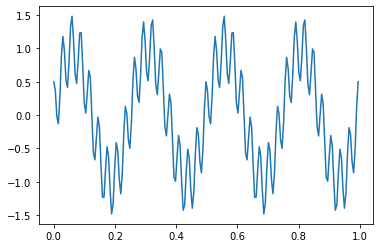

In [7]:
# form the signals and plot s
# student number's last two digits are 04, so f = 4 Hz
f = 4
signal = sin_gen2(1,f,200,1,0,False) + sin_gen2(0.5,f+30,200,1,np.pi/2,False)

plt.plot(np.arange(0,1,1/len(signal)),signal)

**Task 2.2.** Plot the amplitude spectrum of the signal s as a function of **normalized frequency**.

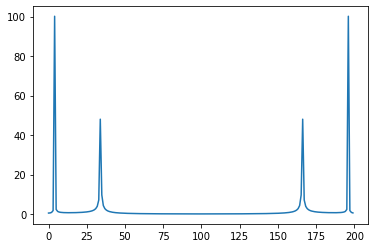

In [9]:
# calculate the frequency response using fft
signal_fft = np.fft.fft(signal)

# take the absolute value of the fft to get the amplitude spectrum
m = np.abs(signal_fft)

# form the vector ff and plot the amplitude spectrum
fs = 200
ff = fs*np.arange(0, len(signal_fft)) / len(signal_fft)
plt.plot(ff,m)


### Instructions for submission
1. Make sure that your code produces the desired results from scratch by selecting Kernel -> Restart & Run all. This will clear the output of your code and run all the code cells again from top to bottom.

2. Rename this notebook to `DF_Assignment2_firstname_lastname_studentnumber.ipynb`.

3. Submit only the resulting notebook (.ipynb file) to the return box in Moodle. Send your submission before the deadline to receive additional week exam points.